# Merging the dataset

In [1]:
from google.colab import drive
import zipfile
import os


In [2]:
# Mount Google Drive
drive.mount('/content/drive')
# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/data.zip'
# Directory to extract the files to
extract_dir = '/content/data'
# Create directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)
# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete.")



Mounted at /content/drive
Extraction complete.


In [3]:
import pandas as pd
# List all CSV files in the extracted directory
csv_files = [f for f in os.listdir(extract_dir) if f.endswith('.csv')]

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Iterate over each CSV file and merge it into the merged_data DataFrame
for csv_file in csv_files:
    file_path = os.path.join(extract_dir, csv_file)
    data = pd.read_csv(file_path)
    merged_data = pd.concat([merged_data, data])

# Reset the index of the merged DataFrame
merged_data.reset_index(drop=True, inplace=True)

In [6]:
merged_data

,time,id,amount,open,high,low,close,count,vol
0,2020-09-17 10:50:00,1600311000,5.000000,1.000,1.00,1.000,1.00,1,5.000000
1,2020-09-17 10:51:00,1600311060,22.500000,1.800,2.90,1.800,2.90,7,53.035500
2,2020-09-17 10:52:00,1600311120,38430.611831,3.135,5.00,3.135,4.50,176,170976.904315
3,2020-09-17 10:53:00,1600311180,35082.842922,4.700,4.70,3.811,4.25,137,143185.813689
4,2020-09-17 10:54:00,1600311240,40050.405645,4.300,5.00,4.250,4.33,186,188397.071618
...,...,...,...,...,...,...,...,...,...
14386005,2021-05-15 09:55:00,1621043700,0.185086,77234.530,77401.22,77211.620,77269.55,53,14302.579541
14386006,2021-05-15 09:56:00,1621043760,0.029410,77286.810,77298.52,77173.130,77298.52,17,2271.341032
14386007,2021-05-15 09:57:00,1621043820,0.052527,77265.410,77361.97,77251.190,77346.77,25,4060.317879
14386008,2021-05-15 09:58:00,1621043880,0.195564,77333.350,77343.40,77180.470,77248.24,27,15117.753864


In [9]:
df = merged_data.head(5000000)
df

,time,id,amount,open,high,low,close,count,vol
0,2020-09-17 10:50:00,1600311000,5.000000,1.0000,1.0000,1.0000,1.0000,1,5.000000
1,2020-09-17 10:51:00,1600311060,22.500000,1.8000,2.9000,1.8000,2.9000,7,53.035500
2,2020-09-17 10:52:00,1600311120,38430.611831,3.1350,5.0000,3.1350,4.5000,176,170976.904315
3,2020-09-17 10:53:00,1600311180,35082.842922,4.7000,4.7000,3.8110,4.2500,137,143185.813689
4,2020-09-17 10:54:00,1600311240,40050.405645,4.3000,5.0000,4.2500,4.3300,186,188397.071618
...,...,...,...,...,...,...,...,...,...
4999995,2021-04-19 11:50:00,1618804200,2670.472803,37.9333,37.9889,37.8001,37.8197,183,101174.321829
4999996,2021-04-19 11:51:00,1618804260,1375.924748,37.8151,37.9573,37.8151,37.9157,91,52156.156946
4999997,2021-04-19 11:52:00,1618804320,1686.303373,37.9157,37.9157,37.8152,37.8673,132,63822.895859
4999998,2021-04-19 11:53:00,1618804380,4917.425304,37.8497,37.8874,37.7631,37.8464,100,186063.193003


In [11]:
output_file_path = "/content/mergeddata.csv"
df.to_csv(output_file_path, index=False)
print(f"Data exported to {output_file_path}")

Data exported to /content/mergeddata.csv


In [12]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=8afd5ee3271707285f0c4cd6341012c5a093a1437c01089fe567af78d94ce548
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("Cryptocurrency") \
    .getOrCreate()

In [14]:
# Load the dataset into a DataFrame
df = spark.read.csv("/content/mergeddata.csv", header=True, inferSchema=True).sample(False, 0.6, seed=42)

In [15]:
# Show the schema of the DataFrame
df.printSchema()

root
 |-- time: timestamp (nullable = true)
 |--  id: integer (nullable = true)
 |--  amount: double (nullable = true)
 |--  open: double (nullable = true)
 |--  high: double (nullable = true)
 |--  low: double (nullable = true)
 |--  close: double (nullable = true)
 |--  count: integer (nullable = true)
 |--  vol: double (nullable = true)



# Perform EDA

In [16]:
# Summary statistics
df.describe().show()

+-------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|summary|                  id|              amount|              open|              high|               low|             close|             count|                vol|
+-------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|  count|             3001035|             3001035|           3001035|           3001035|           3001035|           3001035|           3001035|            3001035|
|   mean|1.6008348274855175E9|   7059074.570853084|  3091.70919388186| 3093.872721033277| 3089.499293754162|3091.7042770535168|142.69577495763963| 103687.43093637026|
| stddev|1.2330292476269588E7| 3.967048314109468E7|10065.471541630937|10073.053313692648|10057.752386145348|10065.440757069591| 380.8237847635328| 477367.63253020984

In [17]:
# Correlation analysis
correlation_matrix = df.select([col(c).cast("float") for c in df.columns]).toPandas().corr()
print(correlation_matrix)

             time        id    amount      open      high       low     close  \
time     1.000000  1.000000  0.101464  0.186088  0.186108  0.186068  0.186088   
 id      1.000000  1.000000  0.101464  0.186088  0.186108  0.186068  0.186088   
 amount  0.101464  0.101464  1.000000 -0.054657 -0.054654 -0.054659 -0.054657   
 open    0.186088  0.186088 -0.054657  1.000000  0.999999  0.999999  0.999999   
 high    0.186108  0.186108 -0.054654  0.999999  1.000000  0.999999  1.000000   
 low     0.186068  0.186068 -0.054659  0.999999  0.999999  1.000000  1.000000   
 close   0.186088  0.186088 -0.054657  0.999999  1.000000  1.000000  1.000000   
 count   0.191250  0.191250  0.011884  0.451394  0.451674  0.451020  0.451347   
 vol     0.117693  0.117693  0.011651  0.459925  0.460259  0.459457  0.459854   

            count       vol  
time     0.191250  0.117693  
 id      0.191250  0.117693  
 amount  0.011884  0.011651  
 open    0.451394  0.459925  
 high    0.451674  0.460259  
 low     

In [20]:
df.columns

['time',
 ' id',
 ' amount',
 ' open',
 ' high',
 ' low',
 ' close',
 ' count',
 ' vol']

# Data visualization

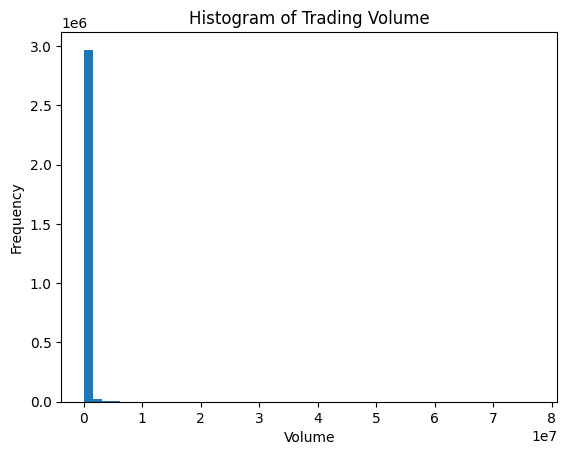

In [21]:
#  Histogram of trading volume
plt.hist(df.select(" vol").rdd.flatMap(lambda x: x).collect(), bins=50)
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.title("Histogram of Trading Volume")
plt.show()


In [22]:
# Line Plot of Closing Prices Over Time

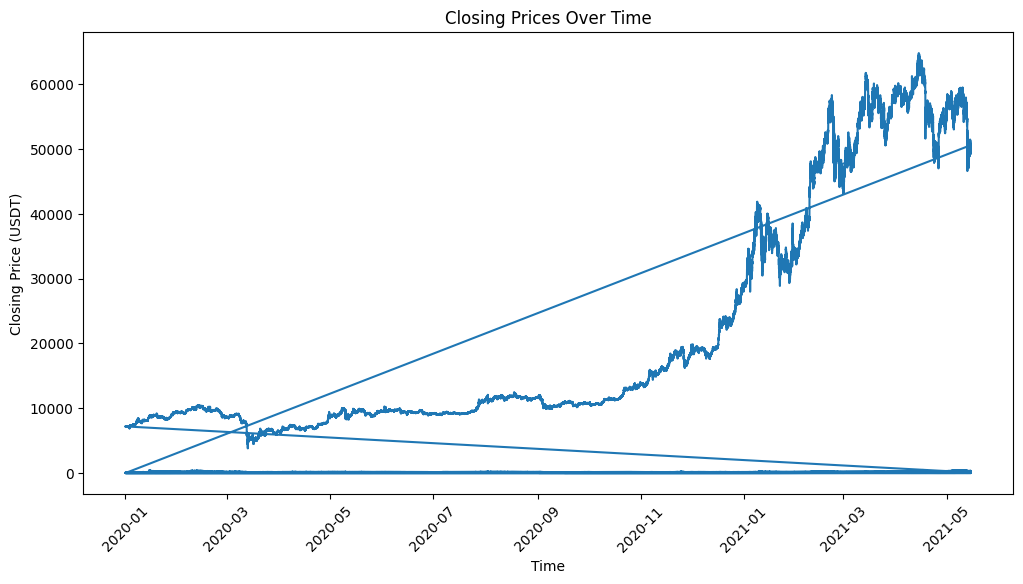

In [23]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to Pandas DataFrame for plotting
df_pd = df.toPandas()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_pd['time'], df_pd[' close'])
plt.xlabel('Time')
plt.ylabel('Closing Price (USDT)')
plt.title('Closing Prices Over Time')
plt.xticks(rotation=45)
plt.show()


In [29]:
df_pd.columns

Index(['time', ' id', ' amount', ' open', ' high', ' low', ' close', ' count',
       ' vol'],
      dtype='object')

In [31]:
#Scatter Plot of Trading Volume vs. Closing Price

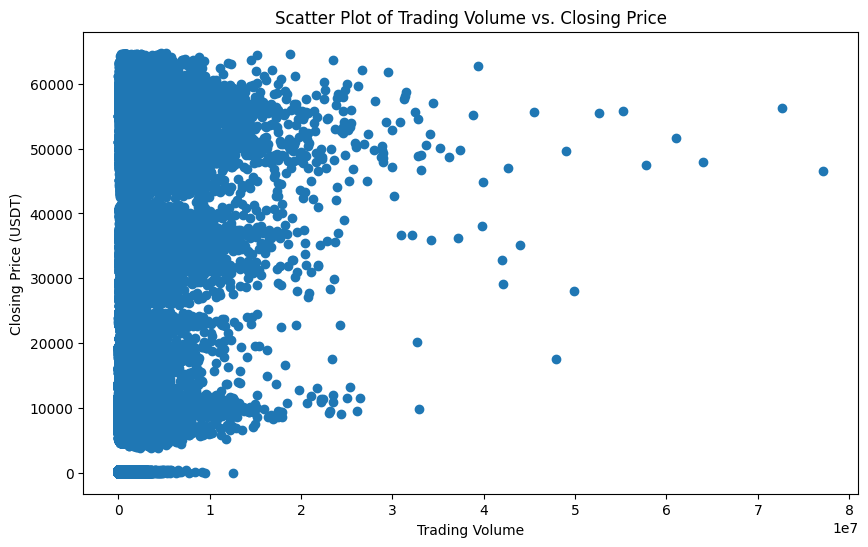

In [30]:
# Create a scatter plot of trading volume vs. closing price
plt.figure(figsize=(10, 6))
plt.scatter(df_pd[' vol'], df_pd[' close'])
plt.xlabel('Trading Volume')
plt.ylabel('Closing Price (USDT)')
plt.title('Scatter Plot of Trading Volume vs. Closing Price')
plt.show()


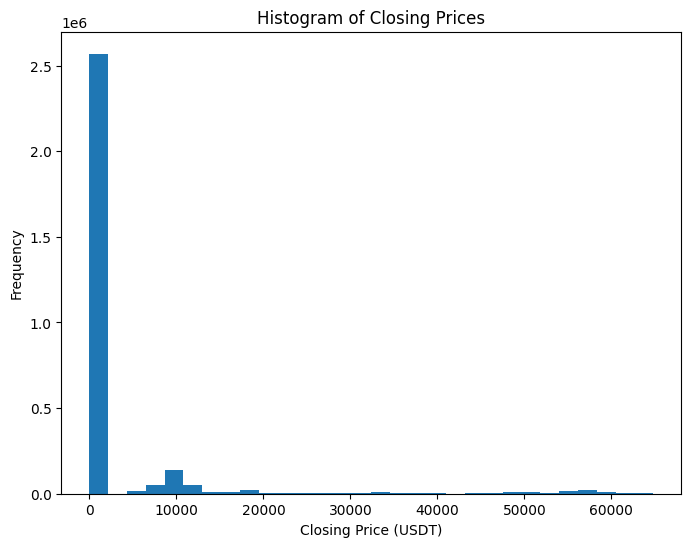

In [26]:
# Histogram of Closing Prices
plt.figure(figsize=(8, 6))
plt.hist(df_pd[' close'], bins=30)
plt.xlabel('Closing Price (USDT)')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices')
plt.show()


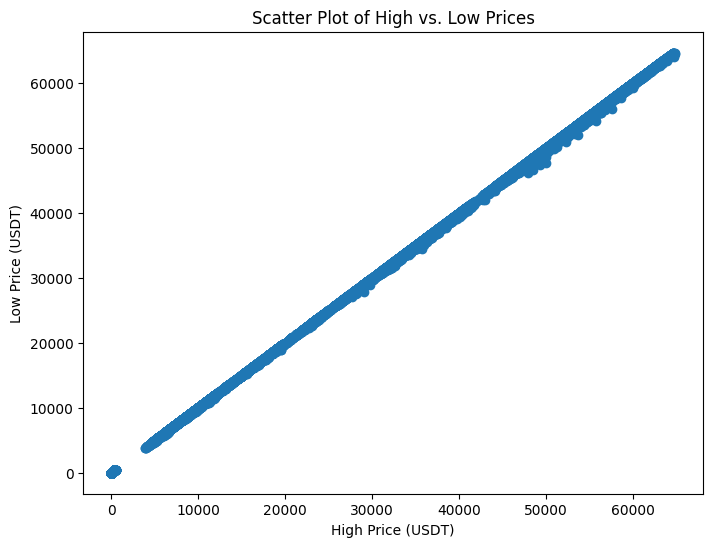

In [27]:
# Scatter Plot of High vs. Low Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_pd[' high'], df_pd[' low'])
plt.xlabel('High Price (USDT)')
plt.ylabel('Low Price (USDT)')
plt.title('Scatter Plot of High vs. Low Prices')
plt.show()


# Boxplot of Closing Prices by Day of the Week

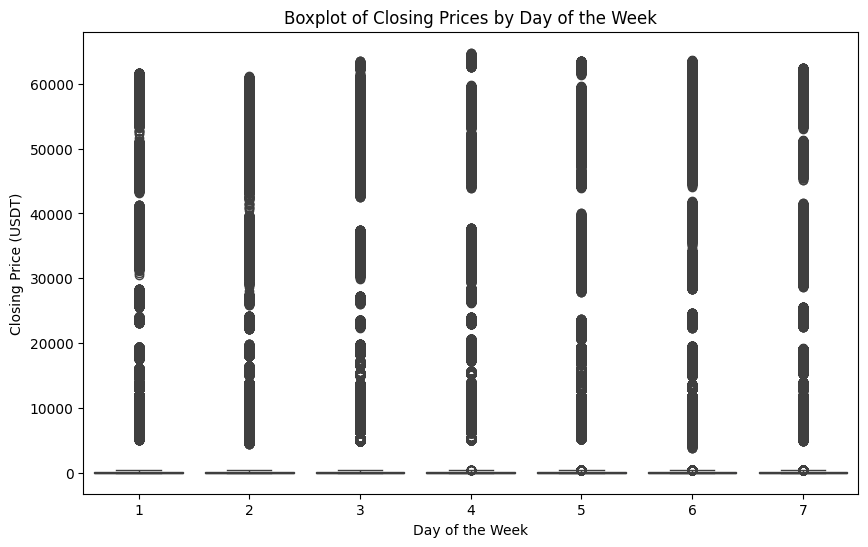

In [32]:
from pyspark.sql.functions import dayofweek
import seaborn as sns
# Add a new column 'day_of_week' to the DataFrame
df_with_day_of_week = df.withColumn('day_of_week', dayofweek('time'))

# Convert the Spark DataFrame to Pandas DataFrame for plotting
df_pd = df_with_day_of_week.toPandas()

# Create a boxplot of closing prices by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y=' close', data=df_pd)
plt.xlabel('Day of the Week')
plt.ylabel('Closing Price (USDT)')
plt.title('Boxplot of Closing Prices by Day of the Week')
plt.show()


In [34]:
df.columns

['time',
 ' id',
 ' amount',
 ' open',
 ' high',
 ' low',
 ' close',
 ' count',
 ' vol']

# Data spliting

In [35]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

# Clean up column names
df_cleaned = df.withColumnRenamed(' amount', 'amount') \
               .withColumnRenamed(' id', 'id') \
               .withColumnRenamed(' open', 'open') \
               .withColumnRenamed(' high', 'high') \
               .withColumnRenamed(' low', 'low') \
               .withColumnRenamed(' close', 'close') \
               .withColumnRenamed(' count', 'count') \
               .withColumnRenamed(' vol', 'vol')

# Assemble features
feature_columns = ['amount', 'count', 'open', 'low', 'high', 'vol']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
df_assembled = assembler.transform(df_cleaned)

# Split the dataset into training and test sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=42)


# Linear Regression model

In [37]:
# Clean up column names
df_cleaned = df.withColumnRenamed(' close', 'close')

# Create a Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='close')

# Train the Linear Regression model
lr_model = lr.fit(train_data)

# Make predictions on the test data for Linear Regression
lr_predictions = lr_model.transform(test_data)

# Evaluate the Linear Regression model
lr_evaluator = RegressionEvaluator(labelCol='close', predictionCol='prediction')
lr_rmse = lr_evaluator.evaluate(lr_predictions, {lr_evaluator.metricName: "rmse"})
lr_r2 = lr_evaluator.evaluate(lr_predictions, {lr_evaluator.metricName: "r2"})

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R-squared: {lr_r2}")


Linear Regression RMSE: 5.7724385599097685
Linear Regression R-squared: 0.999999671388524


# Random Forest Regression model

In [39]:
# Clean up column names
df_cleaned = df.withColumnRenamed(' close', 'close')

# Create a Random Forest Regression model
rf = RandomForestRegressor(featuresCol='features', labelCol='close')

# Train the Random Forest Regression model
rf_model = rf.fit(train_data)

# Make predictions on the test data for Random Forest Regression
rf_predictions = rf_model.transform(test_data)

# Evaluate the Random Forest Regression model
rf_evaluator = RegressionEvaluator(labelCol='close', predictionCol='prediction')
rf_rmse = rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "rmse"})
rf_r2 = rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "r2"})

print(f"Random Forest Regression RMSE: {rf_rmse}")
print(f"Random Forest Regression R-squared: {rf_r2}")


Random Forest Regression RMSE: 1682.137069307223
Random Forest Regression R-squared: 0.9720946900412364


# GBT Regression model

In [40]:
from pyspark.ml.regression import GBTRegressor

# Create a GBT Regression model
gbt = GBTRegressor(featuresCol='features', labelCol='close')

# Train the GBT Regression model
gbt_model = gbt.fit(train_data)

# Make predictions on the test data for GBT Regression
gbt_predictions = gbt_model.transform(test_data)

# Evaluate the GBT Regression model
gbt_evaluator = RegressionEvaluator(labelCol='close', predictionCol='prediction')
gbt_rmse = gbt_evaluator.evaluate(gbt_predictions, {gbt_evaluator.metricName: "rmse"})
gbt_r2 = gbt_evaluator.evaluate(gbt_predictions, {gbt_evaluator.metricName: "r2"})

print(f"GBT Regression RMSE: {gbt_rmse}")
print(f"GBT Regression R-squared: {gbt_r2}")

GBT Regression RMSE: 1405.5483249704107
GBT Regression R-squared: 0.980517008022191


# Create a comparison bar plot

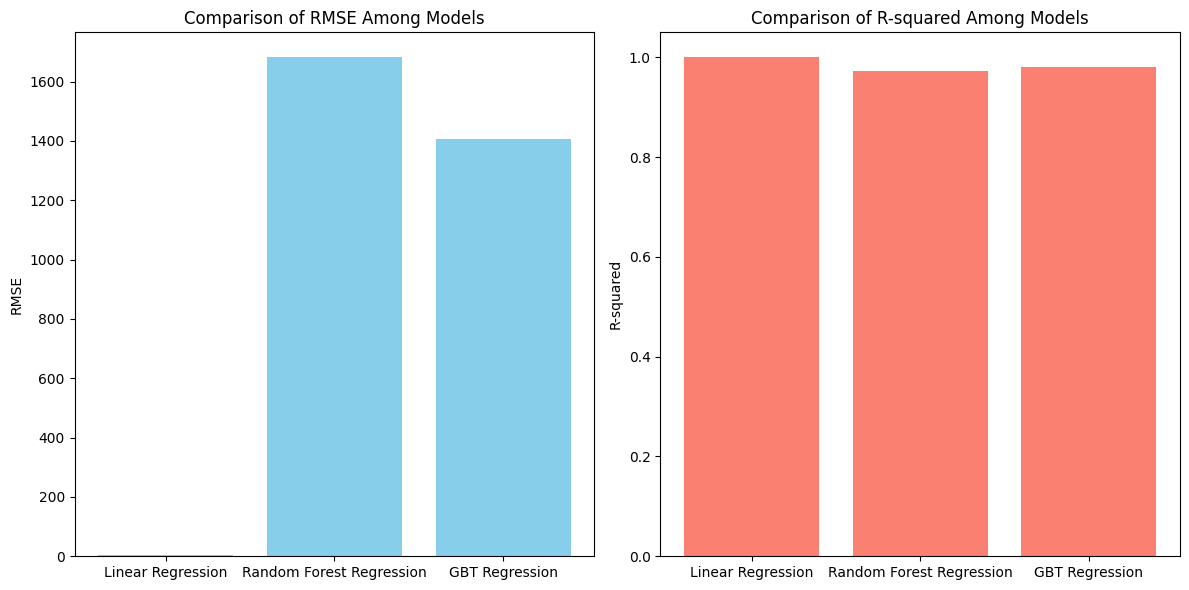

In [41]:

import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest Regression', 'GBT Regression']
rmse_scores = [lr_rmse, rf_rmse, gbt_rmse]
r2_scores = [lr_r2, rf_r2, gbt_r2]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_scores, color='skyblue')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Among Models')

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='salmon')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Among Models')

plt.tight_layout()
plt.show()

In [42]:
# Stop the Spark session
spark.stop()